# Page View Time Series Visualizer

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
df = pd.read_csv("fcc-forum-pageviews.csv")
df['date']= df['date'].astype('datetime64[ns]')
df = df.set_index("date")
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [4]:
#Cleaning Data
df = df[(df["value"]>= df["value"].quantile(0.025)) & (df["value"]<= df["value"].quantile(0.975))]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


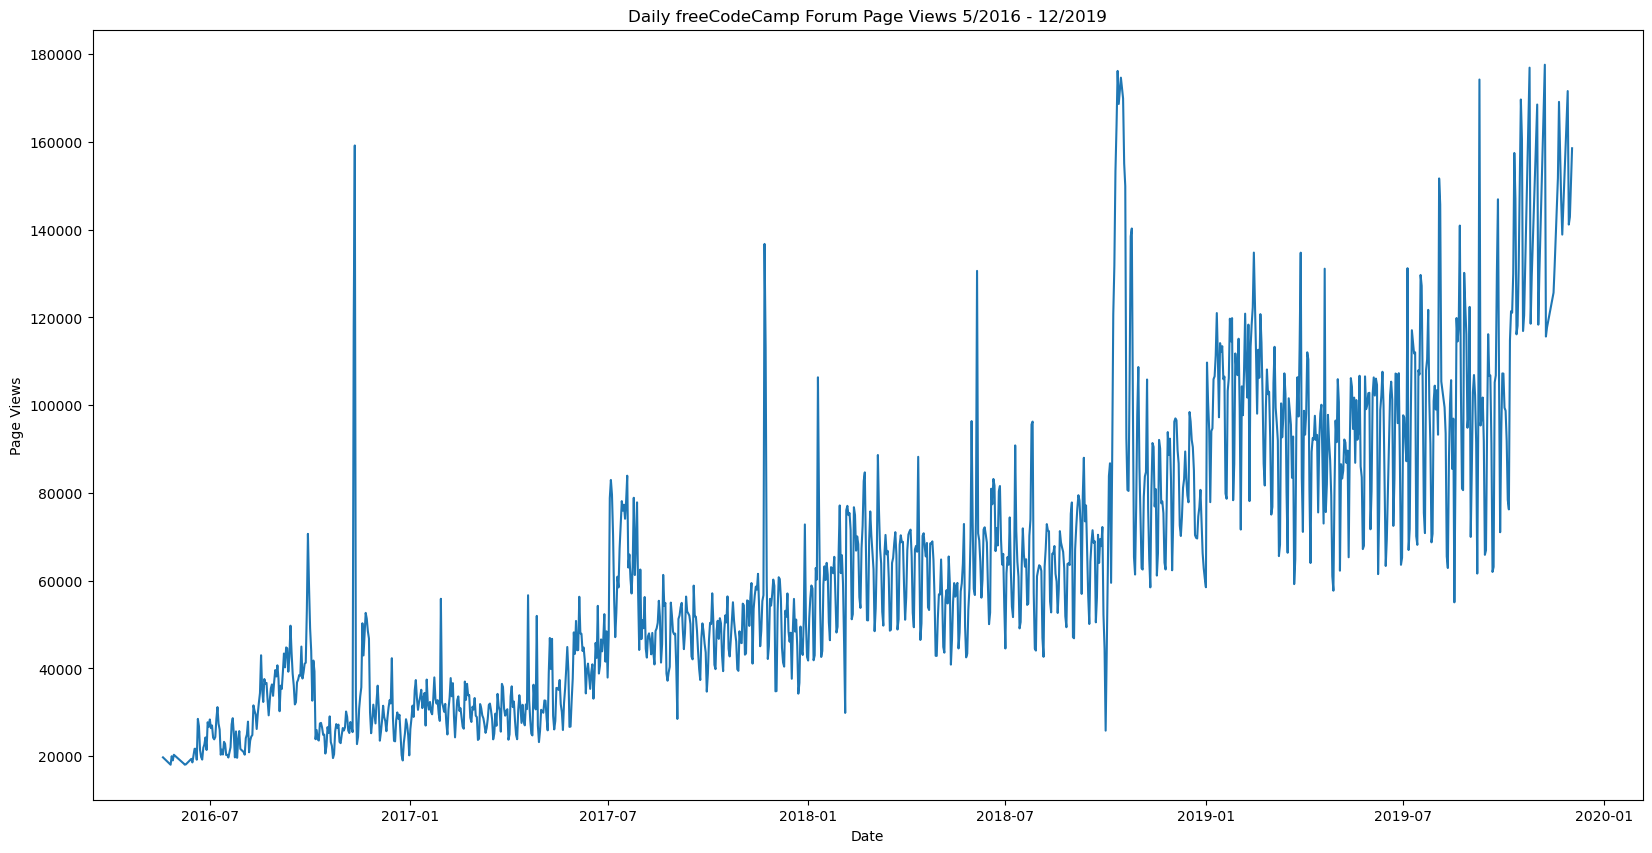

In [9]:
fig, ax = plt.subplots(figsize=(20, 10))

ax = plt.plot(df.index, df['value'])

plt.ylabel("Page Views")
plt.xlabel("Date")
plt.title("Daily freeCodeCamp Forum Page Views 5/2016 - 12/2019");

In [13]:
df_bar = df.copy(deep=True)
df_bar['year'] = pd.DatetimeIndex(df_bar.index).year
df_bar['month'] = pd.DatetimeIndex(df_bar.index).month
df_bar = df_bar.groupby(["year","month"])['value'].mean().reset_index().sort_values(by=['year','month'])
df_bar = df_bar.set_index('year')
df_bar = df_bar.pivot_table(values = "value", index=df_bar.index, columns="month", aggfunc='first').reset_index()

df_bar = df_bar.set_index('year')
df_bar.columns = ['January','February','March','April','May','June','July','August','September','October','November','December']
df_bar= df_bar.fillna(0)
df_bar

,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2016,0.000000,0.000000,0.000000,0.000000,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


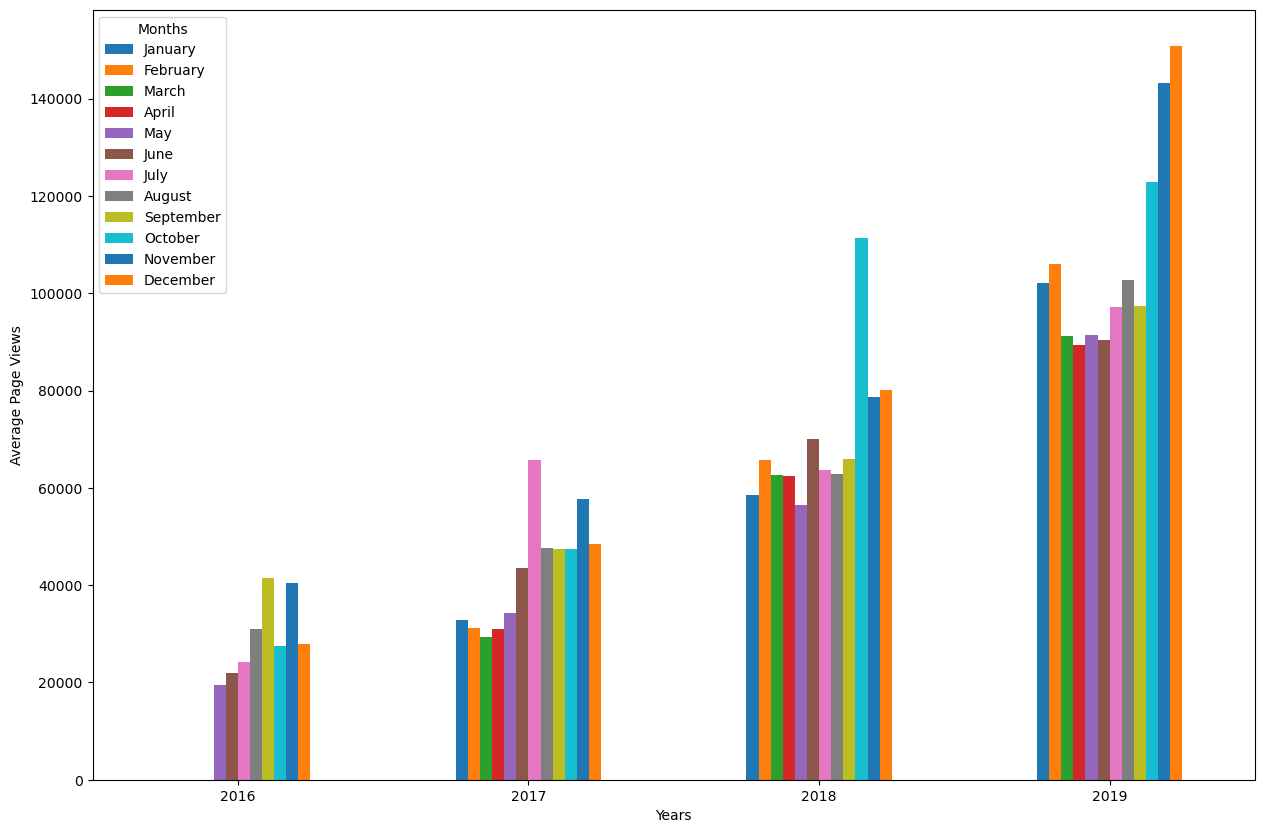

In [12]:
#Creating Barplot
fig, ax = plt.subplots(figsize=(15, 10))

bar = df_bar.plot.bar(rot=0, ax=ax)
plt.xlabel("Years")
plt.ylabel("Average Page Views")
plt.legend(title='Months');

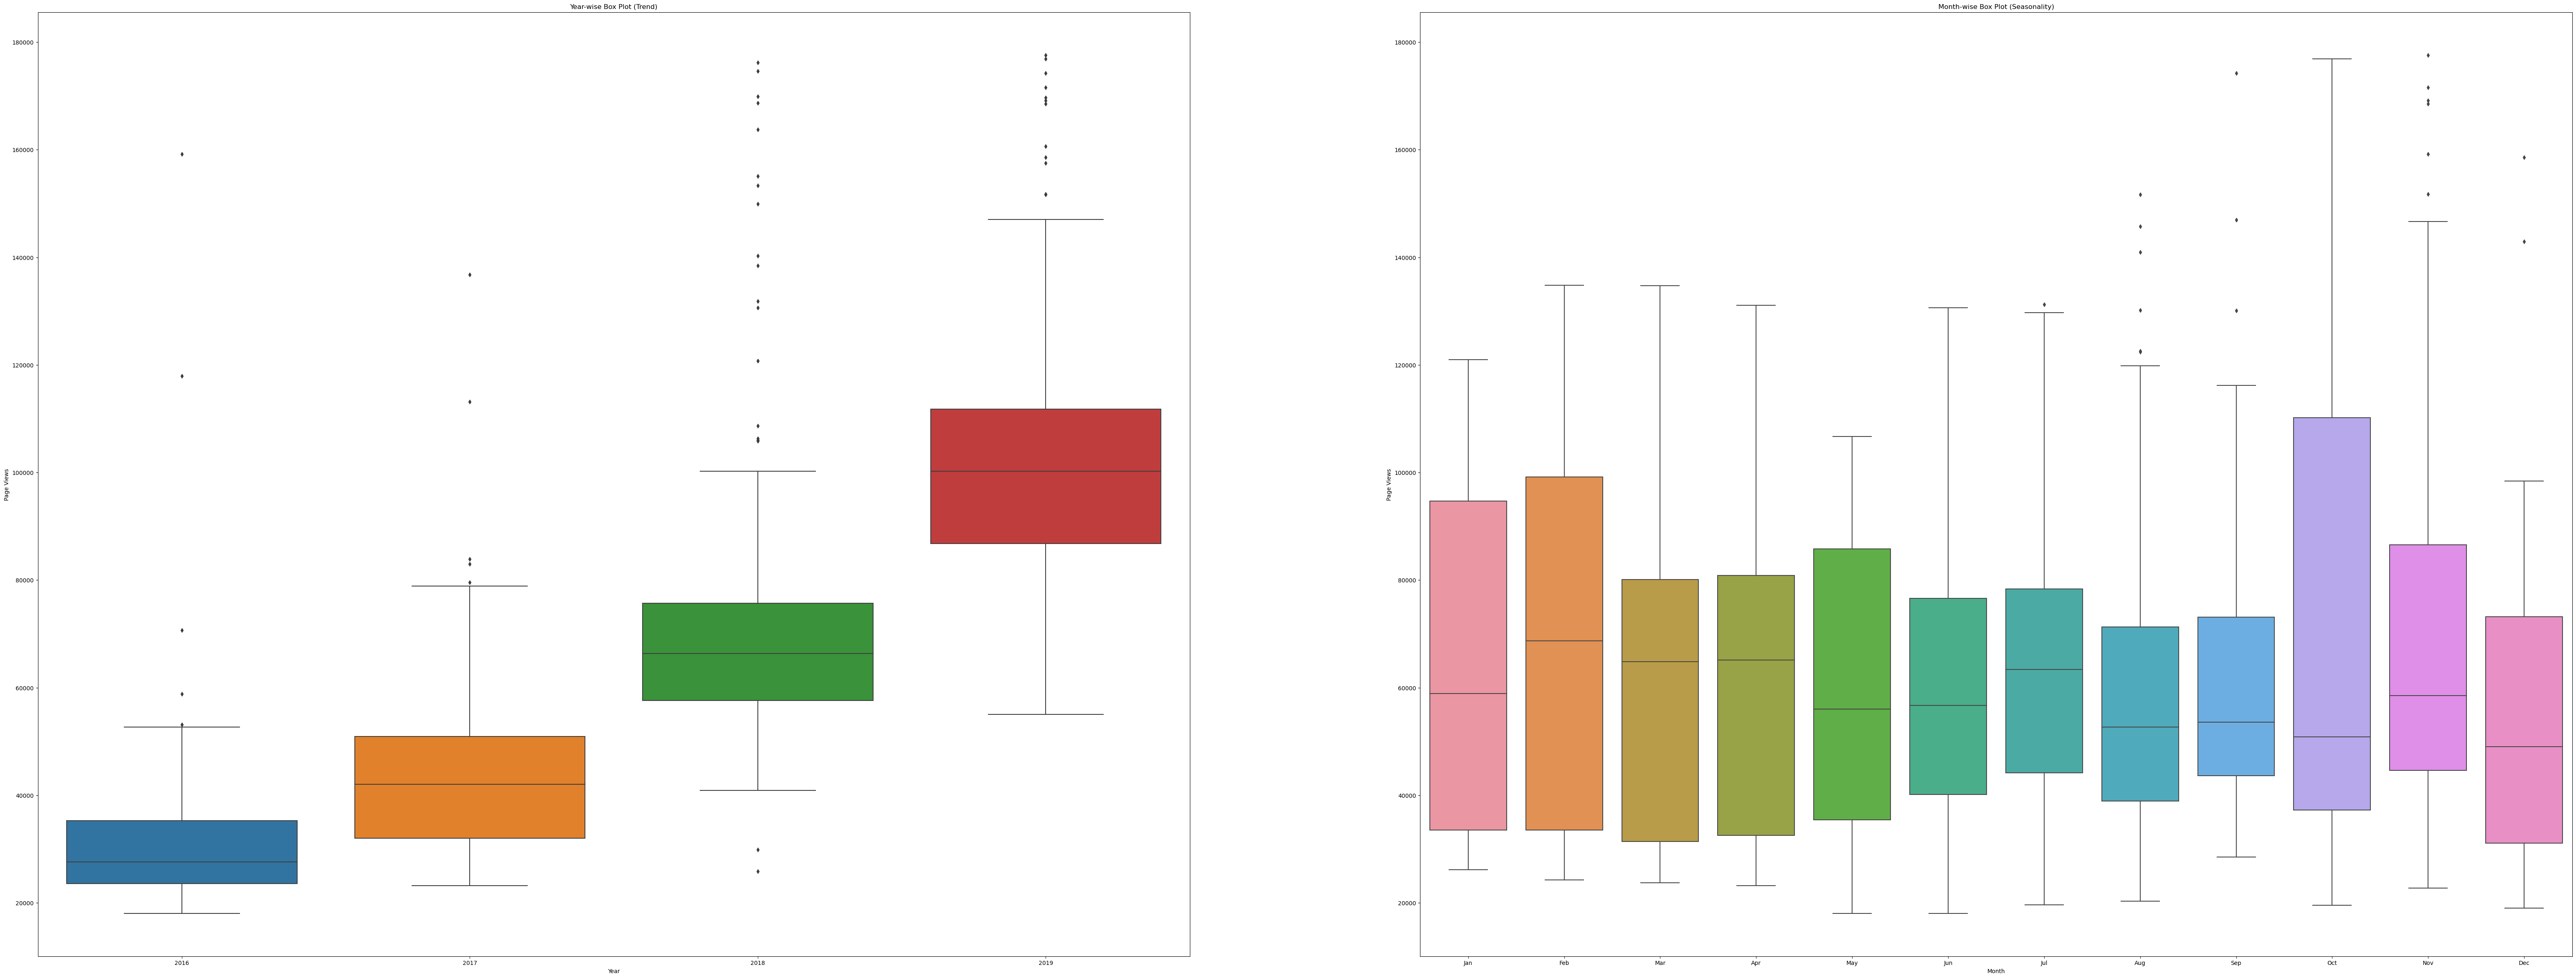

In [20]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

# Draw box plots (using Seaborn)
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figheight(30)
fig.set_figwidth(80)


sns.boxplot(ax=ax1, x="year", y= "value", data=df_box) 
ax1.set_title("Year-wise Box Plot (Trend)")
ax1.set_xlabel("Year")
ax1.set_ylabel("Page Views")

month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

sns.boxplot(ax=ax2, x="month", y= "value", data=df_box, order = month_order) 
ax2.set_title("Month-wise Box Plot (Seasonality)")
ax2.set_xlabel("Month")
ax2.set_ylabel("Page Views");